In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [28]:
# Companies dictionary
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Navistar':'NAV',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'Symantec':'SYMC',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Mitsubishi':'MSBHY',
    'Sony':'SNE',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Bank of America':'BAC'
}
companies = sorted(companies_dict.items(), key=lambda x: x[1])
print(companies)
print(len(companies))

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Mitsubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Symantec', 'SYMC'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]
27


In [9]:
# Define online source
data_source = 'yahoo'

# Start and end dates
start_date = '2015-01-01'
end_date = '2017-12-31'

# datareader to load stock data
panel_data = data.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

# Print Axes Labels
print(panel_data.axes)

[DatetimeIndex(['2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None), MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AAPL', 'AMZN', 'AXP', 'BA', 'BAC', 'CVX', 'GE', 'HMC', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSBHY', 'MSFT', 'NAV', 'NOC', 'PEP', 'SNE', 'SYMC', 'TM', 'TXN', 'VLO', 'WBA', 'XOM']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3

In [27]:
# Find stock open and close data

stock_close = panel_data['Close'][::-1]
stock_open = panel_data['Open'][::-1]

print(stock_close.iloc[0])
print(stock_open.iloc[0])

Symbols
AAPL      169.229996
AMZN     1169.469971
AXP        99.309998
BA        294.910004
BAC        29.520000
CVX       125.190002
GE         17.450001
HMC        34.080002
IBM       153.419998
INTC       46.160000
JNJ       139.720001
KO         45.880001
LMT       321.049988
MA        151.360001
MCD       172.119995
MSBHY      55.450001
MSFT       85.540001
NAV        42.880001
NOC       306.910004
PEP       119.919998
SNE        44.950001
SYMC       28.059999
TM        127.169998
TXN       104.440002
VLO        91.910004
WBA        72.620003
XOM        83.639999
Name: 2017-12-29 00:00:00, dtype: float64
Symbols
AAPL      170.520004
AMZN     1182.349976
AXP       100.000000
BA        296.940002
BAC        29.850000
CVX       125.360001
GE         17.270000
HMC        34.330002
IBM       154.169998
INTC       46.209999
JNJ       140.979996
KO         45.700001
LMT       322.220001
MA        152.210007
MCD       172.979996
MSBHY      55.330002
MSFT       85.629997
NAV        43.7400

In [23]:
# Calculate transpose numpy array
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

print(row)
print(col)

27
756


In [26]:
# Calculate daily movements
movements = np.zeros([row, col])

for i in range(row):
    movements[i, :] = np.subtract(stock_close[i, :], stock_open[i, :])
    
for i in range(len(companies)):
    print("Company : {}, Change : {}".format(companies[i][0], sum(movements[i][:])))
    
print(movements.shape)

Company : Apple, Change : 14.249893188476562
Company : Amazon, Change : -83.93020629882812
Company : American Express, Change : 6.0301055908203125
Company : Boeing, Change : 100.31983947753906
Company : Bank of America, Change : -3.780003547668457
Company : Chevron, Change : 27.60999298095703
Company : General Electrics, Change : 4.770038604736328
Company : Honda, Change : -8.180000305175781
Company : IBM, Change : 15.669967651367188
Company : Intel, Change : 19.52003288269043
Company : Johnson & Johnson, Change : 29.589950561523438
Company : Coca Cola, Change : 11.729976654052734
Company : Lockheed Martin, Change : 57.899932861328125
Company : MasterCard, Change : 23.569869995117188
Company : McDonalds, Change : 51.72001647949219
Company : Mitsubishi, Change : 30.440019607543945
Company : Microsoft, Change : 28.480026245117188
Company : Navistar, Change : -0.6599926948547363
Company : Northrop Grumman, Change : 72.03007507324219
Company : Pepsi, Change : 36.96997833251953
Company : So

Text(0.5,1,"('Coca Cola', 'KO')")

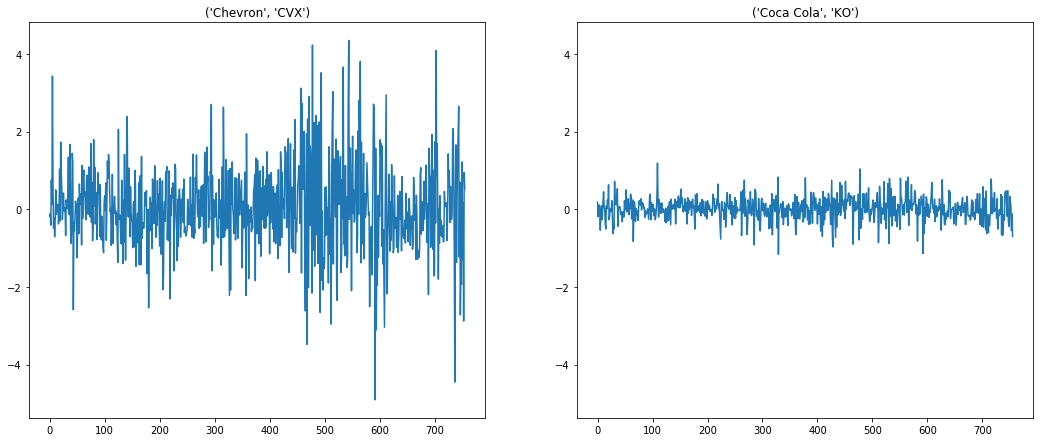

In [35]:
# Visulaization
plt.clf
plt.figure(figsize = (18, 16))
ax1 = plt.subplot(221)
plt.plot(movements[5][:])
plt.title(companies[5])

plt.subplot(222, sharey=ax1)
plt.plot(movements[11][:])
plt.title(companies[11])

In [32]:
# Normalization
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
new = normalizer.fit_transform(movements)

Text(0.5,1,"('Coca Cola', 'KO')")

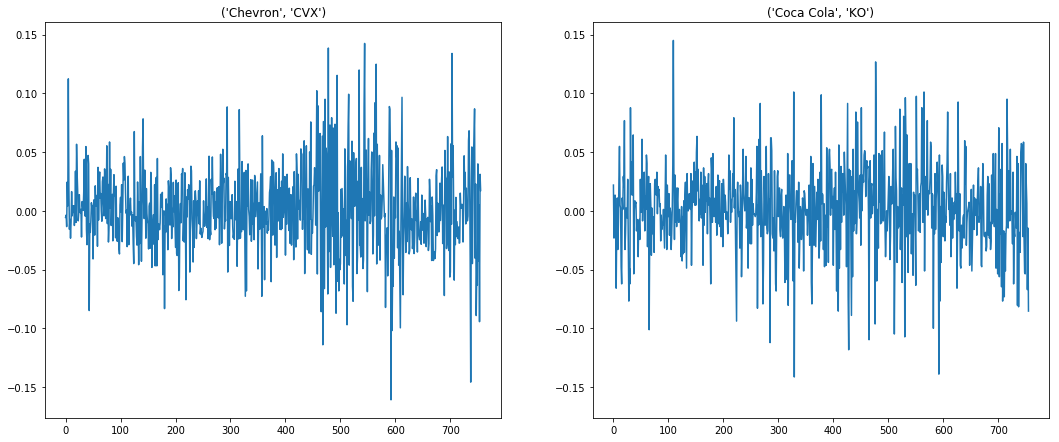

In [34]:
# Visulaization after normalization
plt.clf
plt.figure(figsize = (18, 16))
ax1 = plt.subplot(221)
plt.plot(new[5][:])
plt.title(companies[5])

plt.subplot(222, sharey=ax1)
plt.plot(new[11][:])
plt.title(companies[11])

In [75]:
# Import libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# Create 10 clusters
kmeans = KMeans(n_clusters = 10, max_iter = 1000)

# Make a pipeline to comine normalizer and KMeans
pipeline = make_pipeline(normalizer, kmeans)

In [76]:
# Fit pipeline to daily stock movemments
pipeline.fit(movements)

print(kmeans.inertia_)   # lower score implies better clustering

9.14002977211536


In [77]:
# Import pandas
import pandas as pd

# Predict cluster labels
labels = pipeline.predict(movements)

# Create dataframe aligning labels and companies
df = pd.DataFrame({'labels' : labels, 'companies' : companies})

# Display sort by cluster labels
print(df.sort_values('labels'))

    labels                 companies
20       0               (Sony, SNE)
15       0       (Mitsubishi, MSBHY)
24       1      (Valero Energy, VLO)
22       1              (Toyota, TM)
6        1   (General Electrics, GE)
7        1              (Honda, HMC)
3        2              (Boeing, BA)
12       2    (Lockheed Martin, LMT)
18       2   (Northrop Grumman, NOC)
19       3              (Pepsi, PEP)
11       3           (Coca Cola, KO)
0        4             (Apple, AAPL)
23       4  (Texas Instruments, TXN)
8        4                (IBM, IBM)
9        4             (Intel, INTC)
26       5              (Exxon, XOM)
5        5            (Chevron, CVX)
10       6  (Johnson & Johnson, JNJ)
14       6          (McDonalds, MCD)
17       7           (Navistar, NAV)
4        7    (Bank of America, BAC)
2        7   (American Express, AXP)
25       8           (Walgreen, WBA)
16       9         (Microsoft, MSFT)
21       9          (Symantec, SYMC)
1        9            (Amazon, AMZN)
1

In [81]:
from sklearn.decomposition import PCA

# Visualize results on PCA reduced data
reduced_data = PCA(n_components = 2).fit_transform(new)
print(reduced_data.shape)

# Run k-means on reduced data
kmeans = KMeans(n_clusters = 10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)
print(kmeans.inertia_)

# Create dataframe aligning labels and companies
df = pd.DataFrame({'labels' : labels, 'companies' : companies})

# Display sort by cluster labels
print(df.sort_values('labels'))

(27, 2)
0.09027008974891539
    labels                 companies
1        0            (Amazon, AMZN)
16       0         (Microsoft, MSFT)
26       1              (Exxon, XOM)
5        1            (Chevron, CVX)
25       2           (Walgreen, WBA)
10       2  (Johnson & Johnson, JNJ)
3        2              (Boeing, BA)
24       3      (Valero Energy, VLO)
7        3              (Honda, HMC)
8        3                (IBM, IBM)
22       3              (Toyota, TM)
15       3       (Mitsubishi, MSBHY)
2        3   (American Express, AXP)
19       4              (Pepsi, PEP)
11       4           (Coca Cola, KO)
12       4    (Lockheed Martin, LMT)
18       4   (Northrop Grumman, NOC)
17       5           (Navistar, NAV)
4        5    (Bank of America, BAC)
23       6  (Texas Instruments, TXN)
21       6          (Symantec, SYMC)
0        6             (Apple, AAPL)
13       6          (MasterCard, MA)
9        7             (Intel, INTC)
20       7               (Sony, SNE)
6        8

<Figure size 432x288 with 0 Axes>

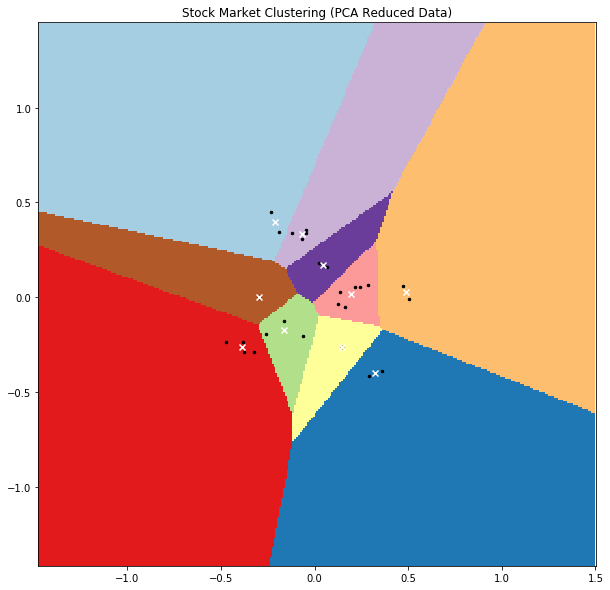

In [87]:
# Step size of mesh
h = 0.01

# Plot  decision boundary
x_min, x_max = reduced_data[:, 0].min()-1, reduced_data[:, 0].max()+1
y_min, y_max = reduced_data[:, 1].min()-1, reduced_data[:, 1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap = plt.cm.Paired
plt.clf()
plt.figure(figsize = (10,10))
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=cmap, aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='w', zorder=10)

plt.title('Stock Market Clustering (PCA Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
